In [1]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set(font_scale=1.2)

## Trial

In [2]:
#NOT GRIDDED
ds = xr.open_dataset(r'data\02_intermediate\tsg_orchestra\b1903933_4_spatial_res.nc').drop_vars(['attenuation','chl-a','sal_tsg_nocal'])
ds.sal_tsg_cal.attrs = {'long_name': 'P_sal_TSG_calib',
 'units': 'dimensionless',
 'ancillary_variables': 'PSALSG01_SEADATANET_QC',
 'sdn_parameter_urn': 'SDN:P01::PSALSG01',
 'sdn_uom_urn': 'SDN:P06::UUUU',
 'sdn_parameter_name': 'Practical salinity of the water body by thermosalinograph and computation using UNESCO 1983 algorithm and calibration against independent measurements',
 'sdn_uom_name': 'Dimensionless'}
ds = ds.metpy.quantify()

In [3]:
ds['SA'] = gsw.SA_from_SP(ds.sal_tsg_cal.metpy.dequantify(), 6.5, ds.lon.metpy.dequantify(), ds.lat.metpy.dequantify())

In [4]:
ds['CT'] = (gsw.CT_from_t(ds.SA, ds.temp_cond_tsg.metpy.dequantify(), 6.5))*units('deg C')

In [5]:
ds.CT

Magnitude,[7.415383805821171 7.412041969514306 7.426205773407748 ... 0.3367231812555381 0.3279891658548357 0.32430478555901104]
Units,coulomb degree


In [8]:
6.5 * units('kg / m**3')

6.5 <Unit('kilogram / meter ** 3')>

In [9]:
ds['SA'] = gsw.SA_from_SP(ds.sal_tsg_cal.metpy.dequantify(), 6.5, ds.lon.metpy.dequantify(), ds.lat.metpy.dequantify())
ds['CT'] = (gsw.CT_from_t(ds.SA, ds.temp_cond_tsg.metpy.dequantify(), 6.5))*units('deg C')
ds['rho'] = (gsw.rho(ds.SA, ds.CT.metpy.dequantify(), 6.5))*units('kg/m**3')

ds.SA.attrs = {
    'long_name :':'Absolute Salinity',
    'Description :':'Calculates Absolute Salinity from Practical Salinity.  Since SP is non-negative by definition, this function changes any negative input values of SP to be zero.',
    'units:':'g/kg'
}

ds.CT.attrs = {
    'long_name :':'Conservative Temperature',
    'Description :':'Calculates Conservative Temperature of seawater from in-situ temperature.',
    'units:':'deg C'
}

ds.rho.attrs = {
    'long_name :':'Density',
    'Description :':'Calculates in-situ density from Absolute Salinity and Conservative Temperature, using the computationally-efficient 75-term expression for specific volume in terms of SA, CT and p (Roquet et al., 2015).',
    'units:':'kg m^-3'
}


In [ ]:
ds.CT.metpy.quantify()*units.degC

Magnitude,[2032.927470365874 2032.0113059423468 2035.894312779734 ... 92.31266014120575 89.91822981910319 88.90815696100287]
Units,kelvin


In [ ]:
ds.SA*units.g / units.kg

Magnitude,[33.85426914967095 33.85351417988021 33.85009930458505 ... 34.10129917139329 34.0975296616746 34.09401696955439]
Units,gram2/kilogram2


In [ ]:
ds.CT.metpy.quantify()

Magnitude,[7.415383805821171 7.412041969514306 7.426205773407748 ... 0.3367231812555381 0.3279891658548357 0.32430478555901104]
Units,dimensionless


In [ ]:
distance = gsw.distance(np.array(ds.lon), np.array(ds.lat))

In [ ]:
mpcalc.gradient(ds.rho.values, deltas = [distance])

(array([ 6.49389633e-06, -7.40284656e-06,  1.30135485e-06, ...,
        -5.36342306e-06, -6.42133202e-06, -6.58014924e-06]) <Unit('dimensionless')>,)

## New stuff

In [ ]:
#define the path
path = '.\\data\\03_processed\\tsg_orchestra\\b1903933_gridded.nc'

#open the dataset with the defined path
ds = xr.open_dataset(path) 

<xarray.Dataset>
Dimensions:       (distance_cum: 1951)
Coordinates:
    lat           (distance_cum) float64 ...
    lon           (distance_cum) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth         (distance_cum) float64 ...
  * distance_cum  (distance_cum) float64 0.0 500.0 1e+03 ... 9.745e+05 9.75e+05
Data variables:
    SP            (distance_cum) float64 ...
    T             (distance_cum) float64 ...
    pressure      (distance_cum) float64 ...
    SA            (distance_cum) float64 ...
    CT            (distance_cum) float64 ...
    rho_pot       (distance_cum) float64 ...
    b             (distance_cum) float64 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [ ]:
#Let's calculate the horizontal buoyancy gradient: (we can take the absolute value as submesoscale fronts are anisotropic)
bx = [(ds.b[i+1] - ds.b[i])/1000 for i in range(len(ds.b) - 1)] #list comprehension
bx = np.abs(bx)

In [ ]:
bx

array([3.57624662e-08, 5.80452479e-08, 1.02959210e-08, ...,
       1.93309630e-08, 2.64593231e-08, 3.09003227e-08])

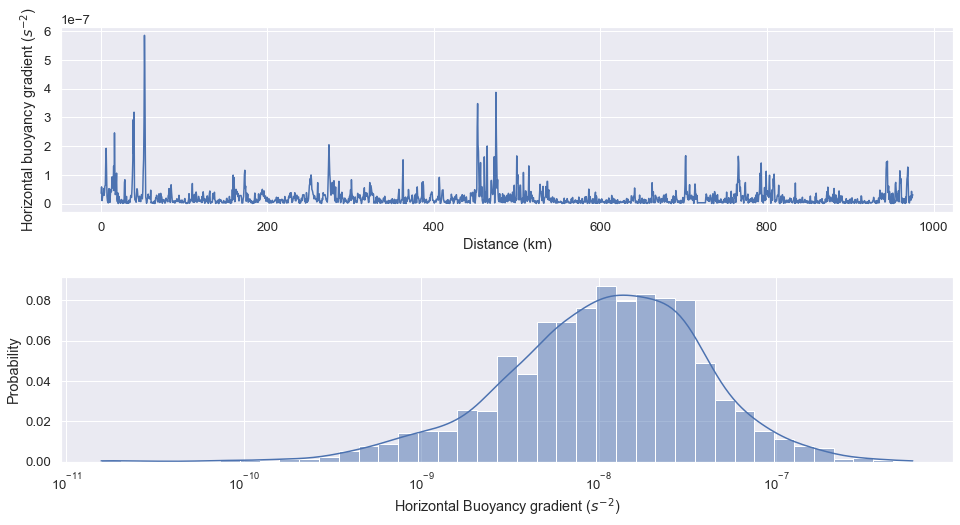

In [ ]:
#Let´s plot bx along the track.
fig, (ax0, ax1) = plt.subplots(nrows=2,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

sns.lineplot(x=ds.distance_cum[1:]/1000, y=bx, ax=ax0)
sns.histplot(data=bx, kde=True, stat='probability', log_scale=True)

ax0.set(xlabel='Distance (km)', ylabel='Horizontal buoyancy gradient ($s^{-2}$)')
ax1.set(xlabel='Horizontal Buoyancy gradient ($s^{-2}$)')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\analysis\\bx.png', bbox_inches='tight', format='png')

#ax0.set(xlabel='Distance (km)', ylabel='Horizontal buoyancy gradient ($s^{-2}$)', yscale='log')

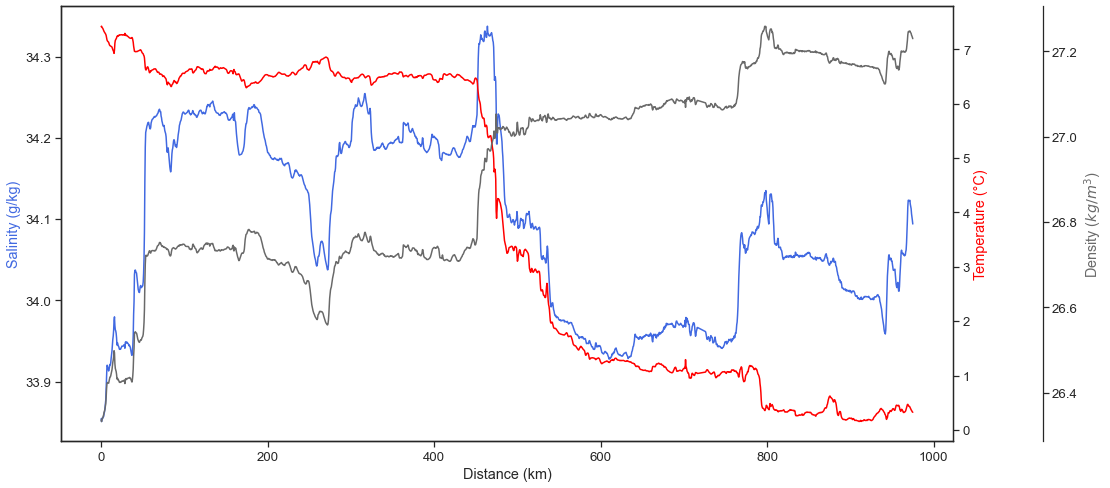

In [ ]:
sns.set_style('ticks')

fig, ax0 = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.9)

ax1 = ax0.twinx()
ax2 = ax0.twinx()

# Offset the right spine of ax2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines['right'].set_position(("axes", 1.1))

p1 = sns.lineplot(x=ds.distance_cum/1000, y=ds.SA, ax=ax0, color='royalblue')
p2 = sns.lineplot(x=ds.distance_cum/1000, y=ds.CT, ax=ax1, color='red')
p3 = sns.lineplot(x=ds.distance_cum/1000, y=ds.rho_pot-1000, ax=ax2, color='dimgrey')

ax0.yaxis.label.set_color('royalblue')
ax1.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('dimgrey')

ax0.set(xlabel='Distance (km)', ylabel='Salinity (g/kg)')
ax1.set(ylabel='Temperature (°C)')
ax2.set(ylabel='Density ($kg/m^{3}$)')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\analysis\\S-T-rho.png', bbox_inches='tight', format='png')

#fooling around with plotly

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ds.distance_cum/1000,
    y=ds.SA,
    name='Salinity (g/kg)',
    line=dict(color="#1f77b4")
))

fig.add_trace(go.Scatter(
    x=ds.distance_cum/1000,
    y=ds.CT,
    name='Temperature (°C)',
    yaxis='y2',
    line=dict(color="#ff7f0e")
))

fig.add_trace(go.Scatter(
    x=ds.distance_cum/1000,
    y=ds.rho_pot-1000,
    name='Density ($kg/m^{3}$)',
    yaxis='y3',
    line=dict(color="gray")
))

#Create axis object
fig.update_layout(
    xaxis=dict(
        domain=[0, 0.95],
        title='Distance (km)',
        showgrid=False
    ),
    yaxis=dict(
        title="Salinity (g/kg)",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        ),
        showgrid=False
    ),
    yaxis2=dict(
        title="Temperature (°C)",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="x",
        overlaying="y",
        side="right",
        showgrid=False
    ),
    yaxis3=dict(
        title="Density ($kg/m^{3}$)",
        titlefont=dict(
            color="gray"
        ),
        tickfont=dict(
            color="gray"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        position=1,
        showgrid=False
    )
)

fig.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)',
    'showlegend':False
    },
    width=1200
)

fig.show()

In [ ]:
ds

<xarray.Dataset>
Dimensions:       (distance_cum: 1951)
Coordinates:
    lat           (distance_cum) float64 ...
    lon           (distance_cum) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth         (distance_cum) float64 ...
  * distance_cum  (distance_cum) float64 0.0 500.0 1e+03 ... 9.745e+05 9.75e+05
Data variables:
    SP            (distance_cum) float64 ...
    T             (distance_cum) float64 ...
    pressure      (distance_cum) float64 ...
    SA            (distance_cum) float64 33.85 33.85 33.85 ... 34.1 34.1 34.09
    CT            (distance_cum) float64 7.416 7.424 7.403 ... 0.3305 0.3246
    rho_pot       (distance_cum) float64 1.026e+03 1.026e+03 ... 1.027e+03
    b             (distance_cum) float64 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [ ]:
ds['alpha'] = gsw.alpha(ds.SA, ds.CT, ds.pressure)
ds['beta'] = gsw.beta(ds.SA, ds.CT, ds.pressure)

ds['alpha'].attrs = {
    'long_name' : 'Thermal expansion coefficient',
    'standard_name' : 'alpha',
    'units' : '1/K',
    'description' : 'Thermal expansion coeffient with respect to conservative temperature calculated using gsw.'
    }

ds['beta'].attrs = {
    'long_name' : 'Haline contraction coefficient',
    'standard_name' : 'beta',
    'units' : 'kg/g',
    'description' : 'Saline (i.e. haline) contraction coefficient of seawater at constant Conservative Temperature calculated using gsw.'
    }

ds['alpha_on_beta'] = gsw.alpha_on_beta(ds.SA, ds.CT, ds.pressure)
ds['alpha_on_beta'].attrs = {
    'long_name' : 'Alpha divided by beta',
    'standard_name' : 'alpha on beta',
    'units' : 'kg g^-1 °C^-1',
    'description' : 'thermal expansion coefficient with respect to Conservative Temperature divided by the saline contraction coefficient at constant Conservative Temperature calculated using gsw.'
    }

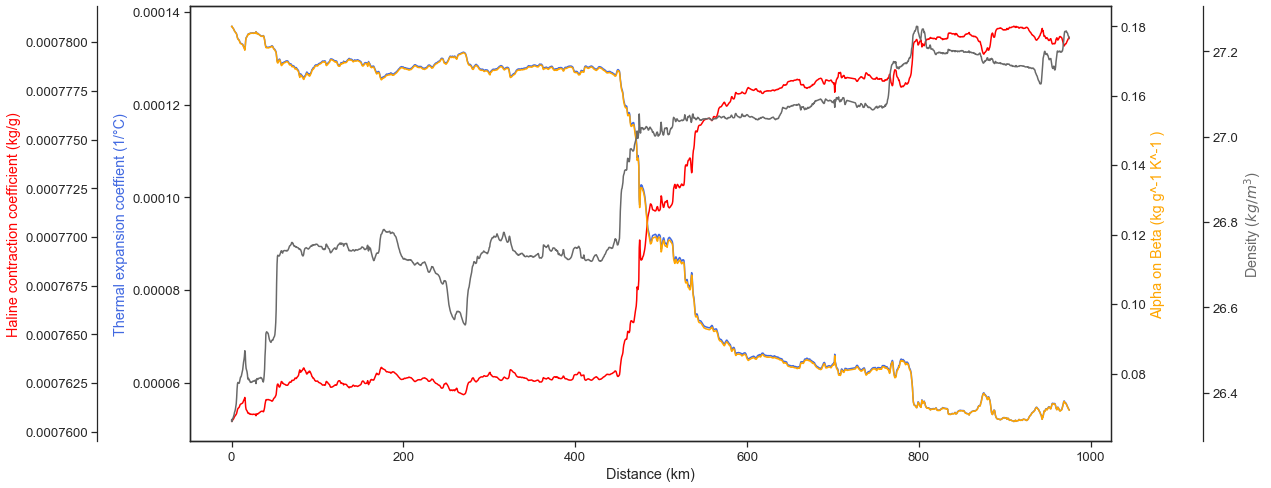

In [ ]:
sns.set_style('ticks')

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax0 = plt.subplots(figsize=(16,8))
fig.subplots_adjust(left=0.1, right=0.9)

ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax3 = ax0.twinx()

# Offset the right spine of ax2.  The ticks and label have already been
# placed on the right by twinx above.
ax1.spines['left'].set_position(("axes", -0.1))
ax3.spines['right'].set_position(("axes", 1.1))

p1 = sns.lineplot(x=ds.distance_cum/1000, y=ds.alpha, ax=ax0, color='royalblue')
p2 = sns.lineplot(x=ds.distance_cum/1000, y=ds.beta, ax=ax1, color='red')
p3 = sns.lineplot(x=ds.distance_cum/1000, y=ds.alpha_on_beta, ax=ax2, color='orange')
p4 = sns.lineplot(x=ds.distance_cum/1000, y=ds.rho_pot-1000, ax=ax3, color='dimgrey')


ax0.yaxis.label.set_color('royalblue')
ax1.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('orange')
ax3.yaxis.label.set_color('dimgrey')

ax0.set(xlabel='Distance (km)', ylabel='Thermal expansion coeffient (1/°C)')
ax1.set(ylabel='Haline contraction coefficient (kg/g)')
ax2.set(ylabel='Alpha on Beta (kg g^-1 K^-1 )')
ax3.set(ylabel='Density ($kg/m^{3}$)')

make_patch_spines_invisible(ax1)

ax1.spines["left"].set_visible(True)
ax1.yaxis.set_label_position('left')
ax1.yaxis.set_ticks_position('left')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\analysis\\alpha_beta_rho.png', bbox_inches='tight', format='png')

In [ ]:
R = np.array([ds.alpha_on_beta[i] * ((ds.CT[i+1] - ds.CT[i]) / (ds.SA[i+1] - ds.SA[i])) for i in range(len(ds.CT)-1)])

<AxesSubplot:xlabel='distance_cum'>

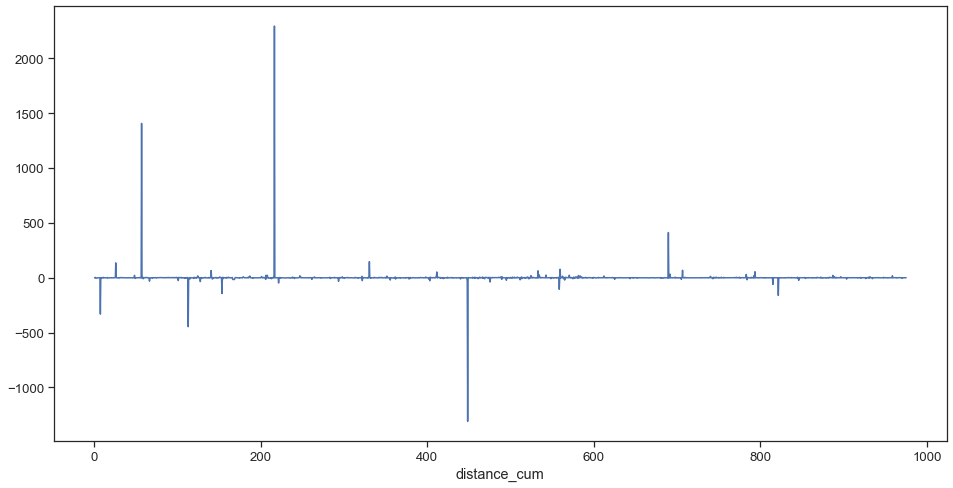

In [ ]:
fig, ax0 = plt.subplots(figsize=(16,8))

sns.lineplot(x=ds.distance_cum[1:]/1000, y=R)

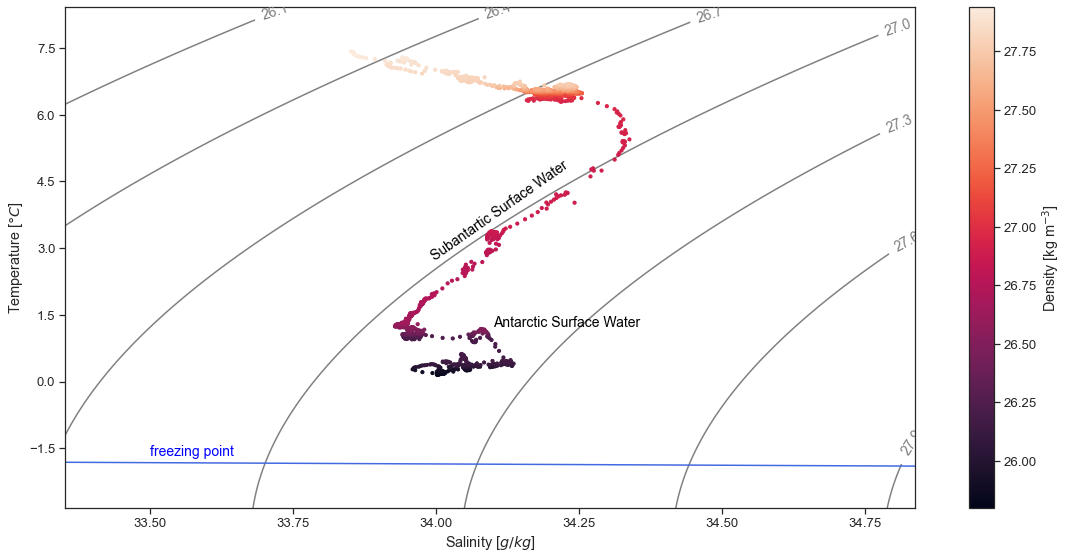

In [ ]:
from matplotlib.ticker import MaxNLocator

df = ds.to_dataframe()

ts = df[['CT','SA']]

df = ts.sort_values('CT',ascending=True)

mint = np.min(df['CT'])
maxt = np.max(df['CT'])

mins = np.min(df['SA'])
maxs = np.max(df['SA'])

tempL = np.linspace(mint-3,maxt+1,1951)

salL = np.linspace(mins-0.5,maxs+0.5,1951)

Tg, Sg = np.meshgrid(tempL,salL)
sigma_theta =gsw.sigma0(Sg,Tg)
cnt = np.linspace(sigma_theta.min(),sigma_theta.max(),1951)

fig, ax = plt.subplots(figsize=(16,8))
cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl = plt.clabel(cs, fontsize=14, inline=True, fmt='%.1f')

sc = plt.scatter(df['SA'], df['CT'], c=cnt, s=10)
fp = plt.plot(salL, gsw.CT_freezing(salL, 0, 0), color='royalblue')
cb = plt.colorbar(sc)

ax.set(xlabel='Salinity [$g/kg$]', ylabel='Temperature [$°C$]')
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.tick_params(direction='out')
cb.ax.tick_params(direction='out')
cb.set_label('Density [kg m$^{-3}$]')
plt.tight_layout()

freezestr = '\nfreezing point'
ax.text(33.5, -1.4, 
    freezestr,
    color='blue', 
    #transform=ax.transAxes, 
    fontsize=14,
    verticalalignment='center')

SubantSurWatstr = '\nSubantartic Surface Water'
ax.text(33.97, 4.0,
    SubantSurWatstr,
    color='black',
    fontsize=14,
    verticalalignment='center',
    rotation=35)

AntSurWatstr = '\nAntarctic Surface Water'
ax.text(34.1, 1.5,
    AntSurWatstr,
    color='black',
    fontsize=14,
    verticalalignment='center')

#ConShelfWatstr = '\nContinental Shelf Water'
#ax.text(33.9, -0.1,
 #   ConShelfWatstr,
 #   color='black',
 #   fontsize=14,
 #   verticalalignment='center')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\analysis\\TS-plot.png', bbox_inches='tight', format='png')
plt.show()

In [ ]:
ds

<xarray.Dataset>
Dimensions:        (distance_cum: 1951)
Coordinates:
    lat            (distance_cum) float64 -52.5 -52.51 -52.51 ... -61.19 -61.2
    lon            (distance_cum) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth          (distance_cum) float64 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * distance_cum   (distance_cum) float64 0.0 500.0 1e+03 ... 9.745e+05 9.75e+05
Data variables:
    SP             (distance_cum) float64 33.69 33.69 33.7 ... 33.94 33.93 33.93
    T              (distance_cum) float64 7.405 7.413 7.392 ... 0.3259 0.32
    pressure       (distance_cum) float64 6.558 6.558 6.558 ... 6.563 6.563
    SA             (distance_cum) float64 33.85 33.85 33.85 ... 34.1 34.1 34.09
    CT             (distance_cum) float64 7.416 7.424 7.403 ... 0.3305 0.3246
    rho_pot        (distance_cum) float64 1.026e+03 1.026e+03 ... 1.027e+03
    b              (distance_cum) float64 0.006339 0.006374 ... -0.002198
    alpha          (distance_cum) float64 0.0001368 0.0001369 ... 5.418e-05
    beta           (distance_cum) float64 0.0007605 0.0007605 ... 0.0007803
    alpha_on_beta  (distance_cum) float64 0.1799 0.18 0.1797 ... 0.06956 0.06944
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [ ]:
ds.rho_pot[:-1] * R

<xarray.DataArray 'rho_pot' (distance_cum: 1950)>
array([-415.80639467, -925.0972072 , 3164.5701092 , ...,  299.06386996,
        222.88534321,   95.38109471])
Coordinates:
    lat           (distance_cum) float64 -52.5 -52.51 -52.51 ... -61.19 -61.19
    lon           (distance_cum) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth         (distance_cum) float64 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * distance_cum  (distance_cum) float64 0.0 500.0 1e+03 ... 9.74e+05 9.745e+05